In [4]:
import json
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from utils.evaluation.jsonEncoder import NpEncoder
def get_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
    return data
SAVE = get_from_json("./Figure/BoxPlots/Result.json")
#SAVE = get_from_json("./Figure/BoxPlots/ResultNew.json")
SAVE = get_from_json("./Figure/BoxPlots/ResultNew1.json")

In [9]:
import itertools
from collections.abc import Iterable
import csv
def create_csv(result, model_list, filename):
    data  = []
    data.append(["evalType"]+model_list)
    for r in result:
        name = [r]
        data.append(name+ result[r])
    with open(filename+".csv", 'w') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(data)
def transpose(data):
    data = list(map(list, itertools.zip_longest(*data, fillvalue=None)))
    return data
def convert_radar_csv(obj,data, model,savepath):
        model = ["graphType"]+model
        csv_data = [model]
        for graphType in data:
            buffer = [obj+"_"+graphType]
            buffer+= data[graphType]
            csv_data.append(buffer)
        #csv_data = transpose(csv_data)
        with open(savepath+".csv", 'w') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')
            csvwriter.writerows(csv_data)
def list_to_csv(data,model):
    csv_data = []    
    for graphType in data:
        buffer = [model+"_"+graphType]
        buffer+= data[graphType]
        csv_data.append(buffer)
    return csv_data
def get_data_global_feature(JSON, model_name,graphType,savepath):
    method ="result_Syn"
    data = {model:[] for model in model_name}
    for color_code, model in enumerate(model_name):
            for pos,evalType in enumerate(['Degree','Homogeneity']):
                result = SAVE[model][method]
                if graphType == "all":
                    data[model] += result[evalType]["barabasi"][measure] + result[evalType]["erdos"][measure] +  result[evalType]["erdos"][measure] +  result[evalType]["small-world"][measure]
                else:
                    data[model] += result[evalType][graphType][measure]
    csv_data = []
    for graphType in data:
        buffer = [graphType]
        buffer+= data[graphType]
        csv_data.append(buffer)
    csv_data = transpose(csv_data)
    with open(savepath+".csv", 'w') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(csv_data)
    
    
def convert_box_csv(data,obj,savepath):
    csv_data = transpose(data)
    for i, d in enumerate(csv_data):
        if i == 0:
            csv_data[i] = ["Obj"]+d
        else:
            csv_data[i] = [obj]+d
    with open(savepath+".csv", 'w') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(csv_data)

# Centrality Feature

## ER Model

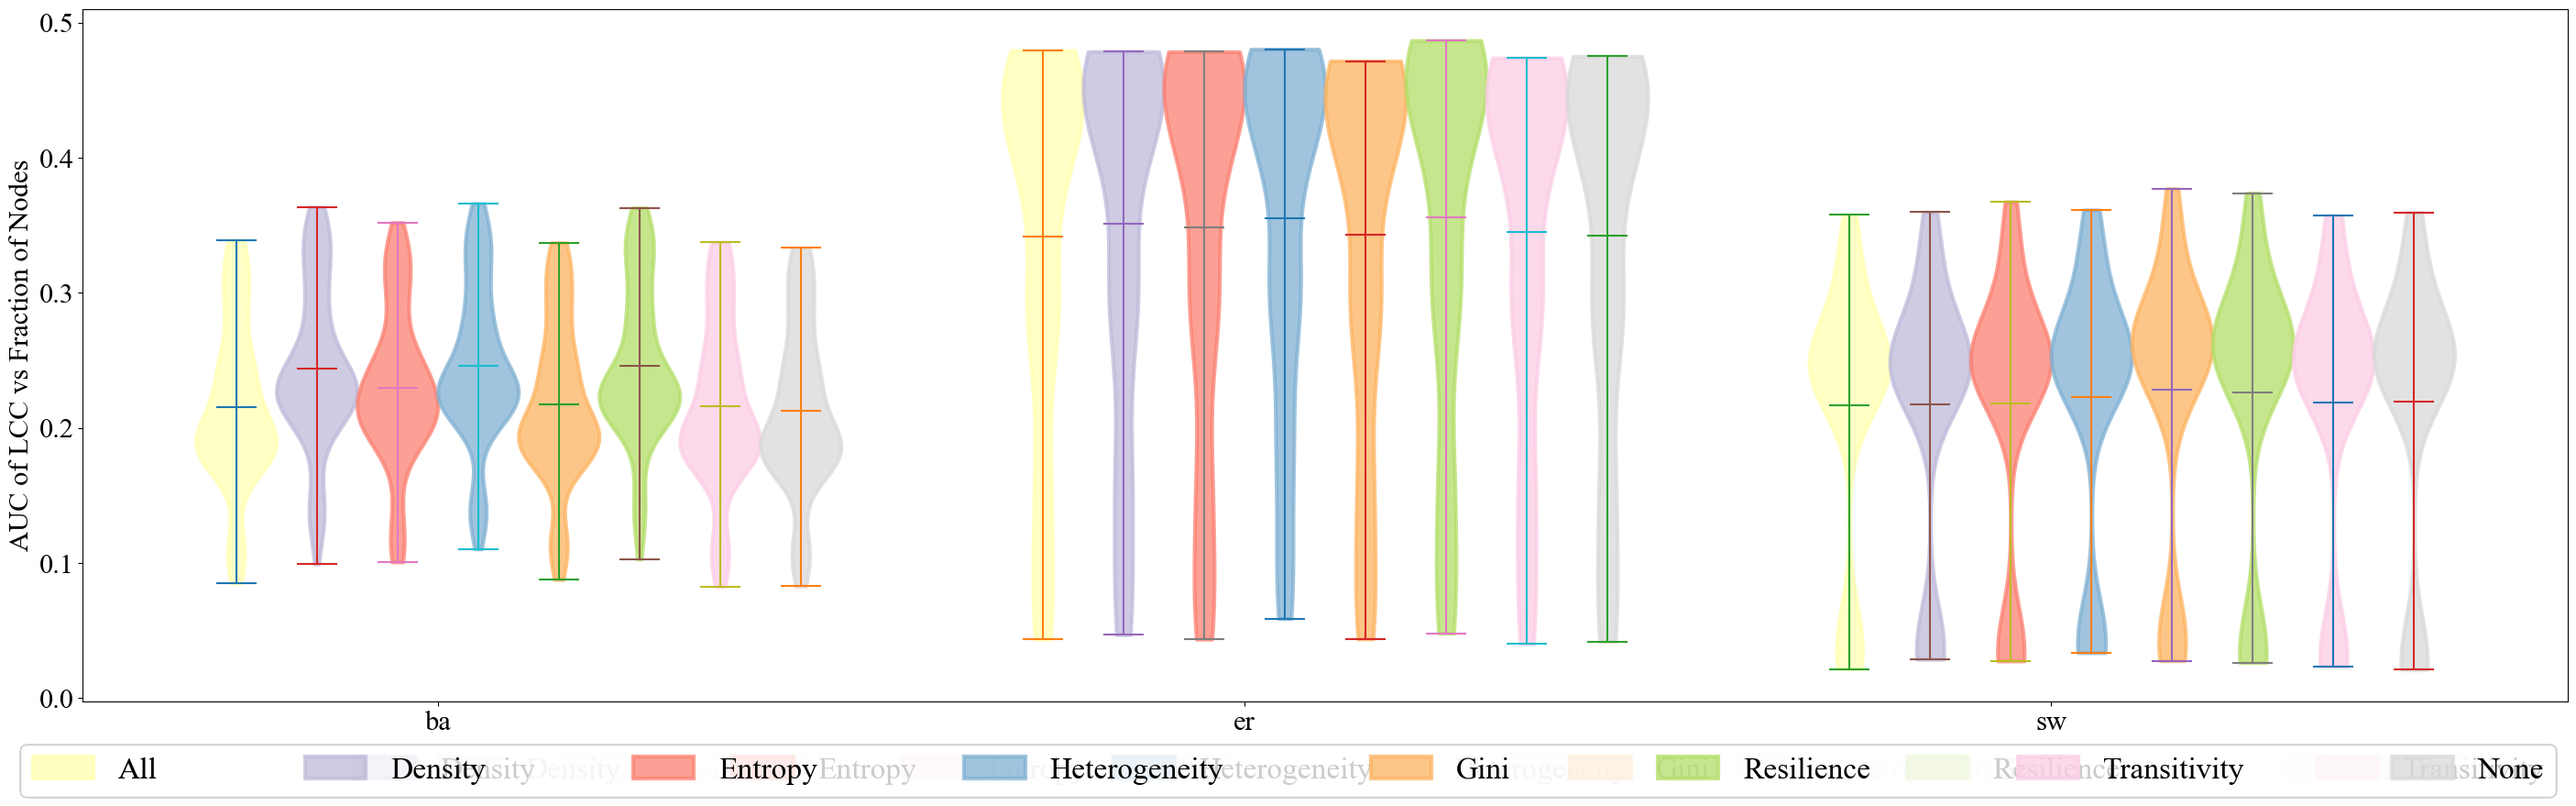

In [122]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['er', 'Density_er', 'Entropy_er', 'Heterogeneity_er','Gini_er','Resilience_er', 'Transitivity_er', 'None_er']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(28, 8), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
font = {'weight' : 'normal',
    'size'   : 22}
matplotlib.rc('font', **font)
n_models = len(labeling)
shift = 1 / (n_models + 1)
handles = []
for method in ["result_Syn"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                data = {"ba": [], 
                    "er":[], 
                    "sw":[]}
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data["ba"] =  data["ba"]+  result[evalType]["barabasi"][measure] 
                    data["er"] = data["er"]+  result[evalType]["erdos"][measure] 
                    data["sw"] = data["sw"]+  result[evalType]["small-world"][measure]
                for position,key in enumerate(data):
                    '''bp = ax.boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=1.5,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    if position == 0:
                        handles.append(bp["boxes"][0])'''
                    bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                    for pc in bp["bodies"]:
                        pc.set_facecolor(color[color_code])
                        pc.set_edgecolor(color[color_code])
                        pc.set_linewidth(3)
                        pc.set_alpha(0.75)
                    if position == 0:
                        handles.append(bp["bodies"][0])
                ax.set_ylabel('AUC of LCC vs Fraction of Nodes')
                ax.set_xticks(np.arange(0, len(data))*20)
                ax.set_xticklabels(data.keys())
            '''else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())'''
            x = (color_code + 1) * shift - shift / 2
            fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
            #fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
#fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (ER)")
get_data_global_feature(result, model_name,graphType="erdos", savepath="./Figure/BoxPlots/ER")
#plt.savefig("./Figure/BoxPlots/Single_ER_GlobalFeature.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

## SW Model

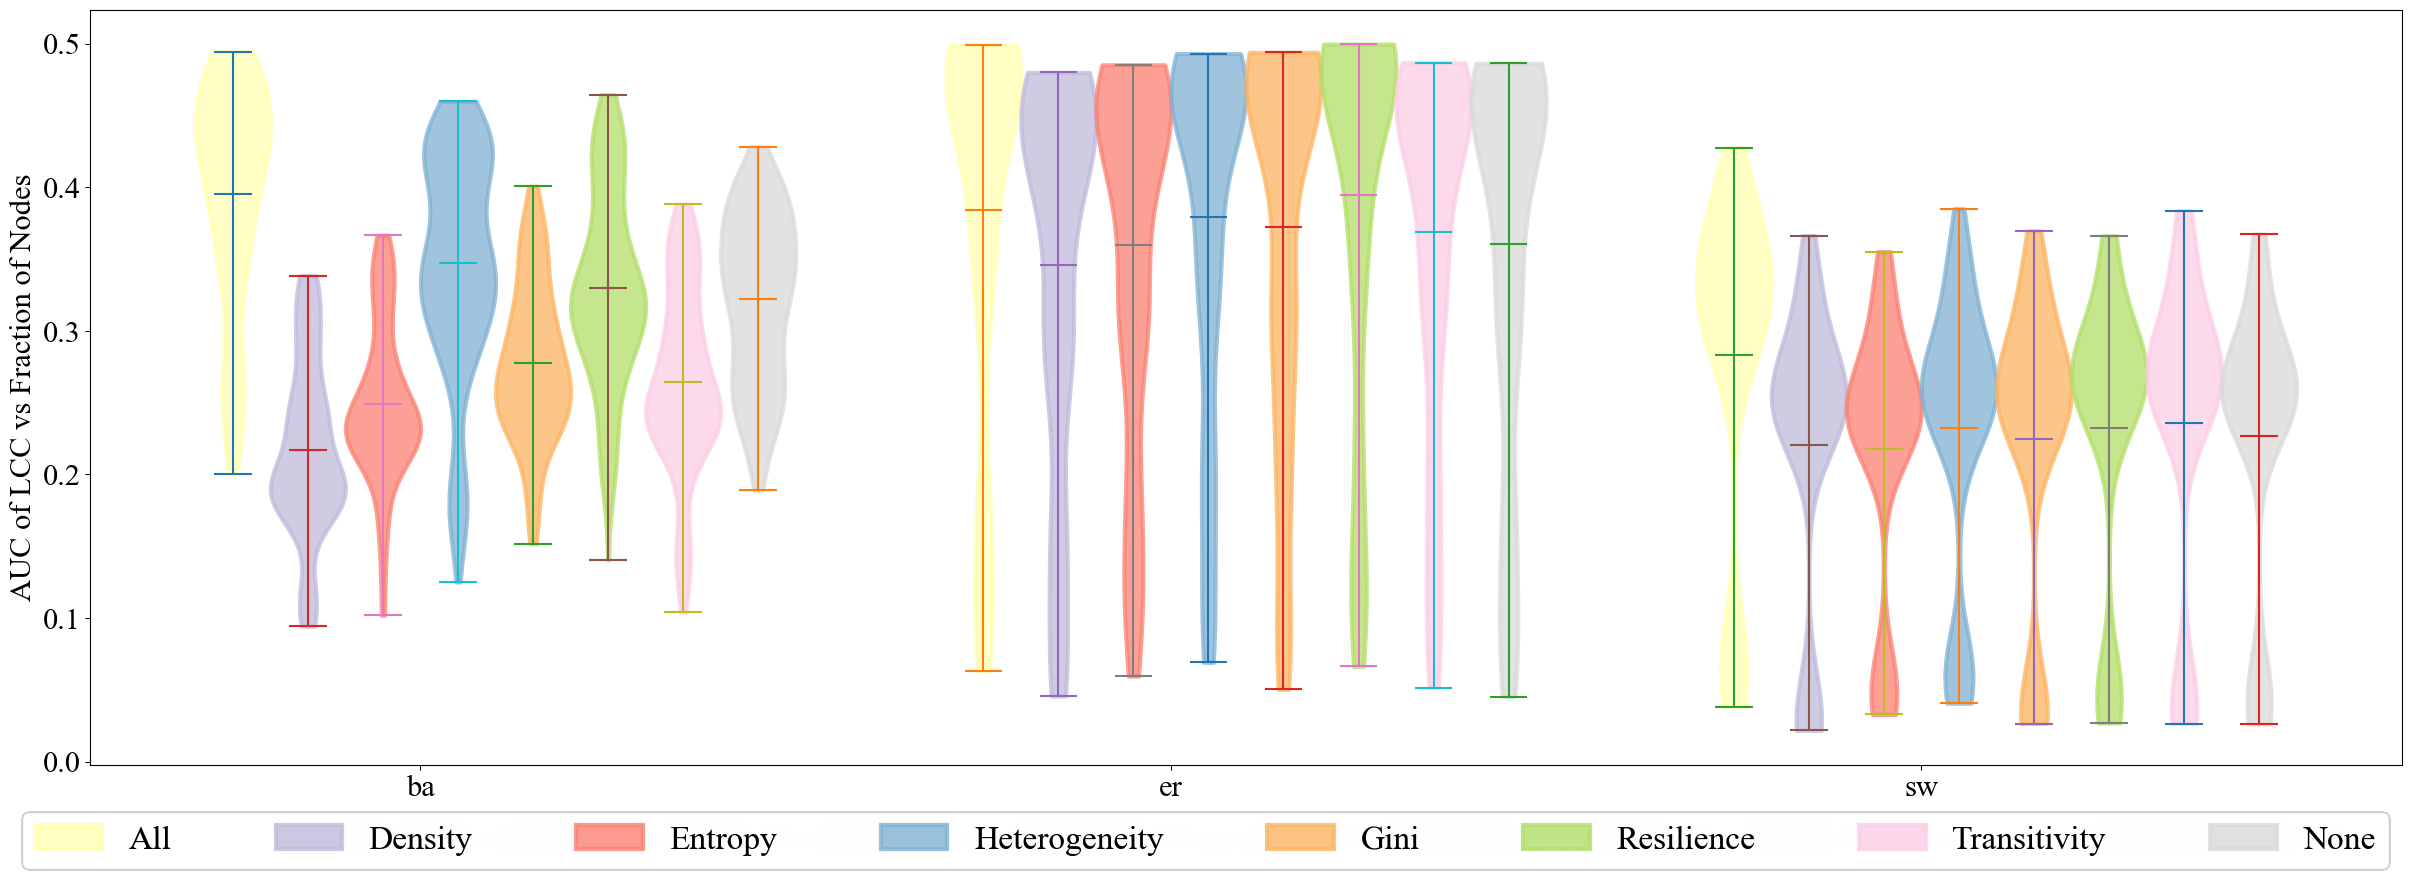

In [123]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['sw', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_sw']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(24, 8), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
font = {'weight' : 'normal',
    'size'   : 22}
matplotlib.rc('font', **font)
n_models = len(labeling)
shift = 1 / (n_models + 1)
handles = []

for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                data = {"ba": [], 
                    "er":[], 
                    "sw":[]}
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data["ba"] =  data["ba"]+  result[evalType]["barabasi"][measure] 
                    data["er"] = data["er"]+  result[evalType]["erdos"][measure] 
                    data["sw"] = data["sw"]+  result[evalType]["small-world"][measure] 
                for position,key in enumerate(data):
                    '''bp = ax.boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=1.5,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    if position == 0:
                        handles.append(bp["boxes"][0])'''
                    bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                    for pc in bp["bodies"]:
                        pc.set_facecolor(color[color_code])
                        pc.set_edgecolor(color[color_code])
                        pc.set_linewidth(3)
                        pc.set_alpha(0.75)
                    if position == 0:
                        handles.append(bp["bodies"][0])
                ax.set_ylabel('AUC of LCC vs Fraction of Nodes')
                ax.set_xticks(np.arange(0, len(data))*20)
                ax.set_xticklabels(data.keys())
            '''else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())'''
            x = (color_code + 1) * shift - shift / 2
            fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
            
            #fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
#fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (SW)")
get_data_global_feature(result, model_name,graphType="small-world" , savepath="./Figure/BoxPlots/SW")
#plt.savefig("./Figure/BoxPlots/Single_SW_GlobalFeature.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

## BA Model

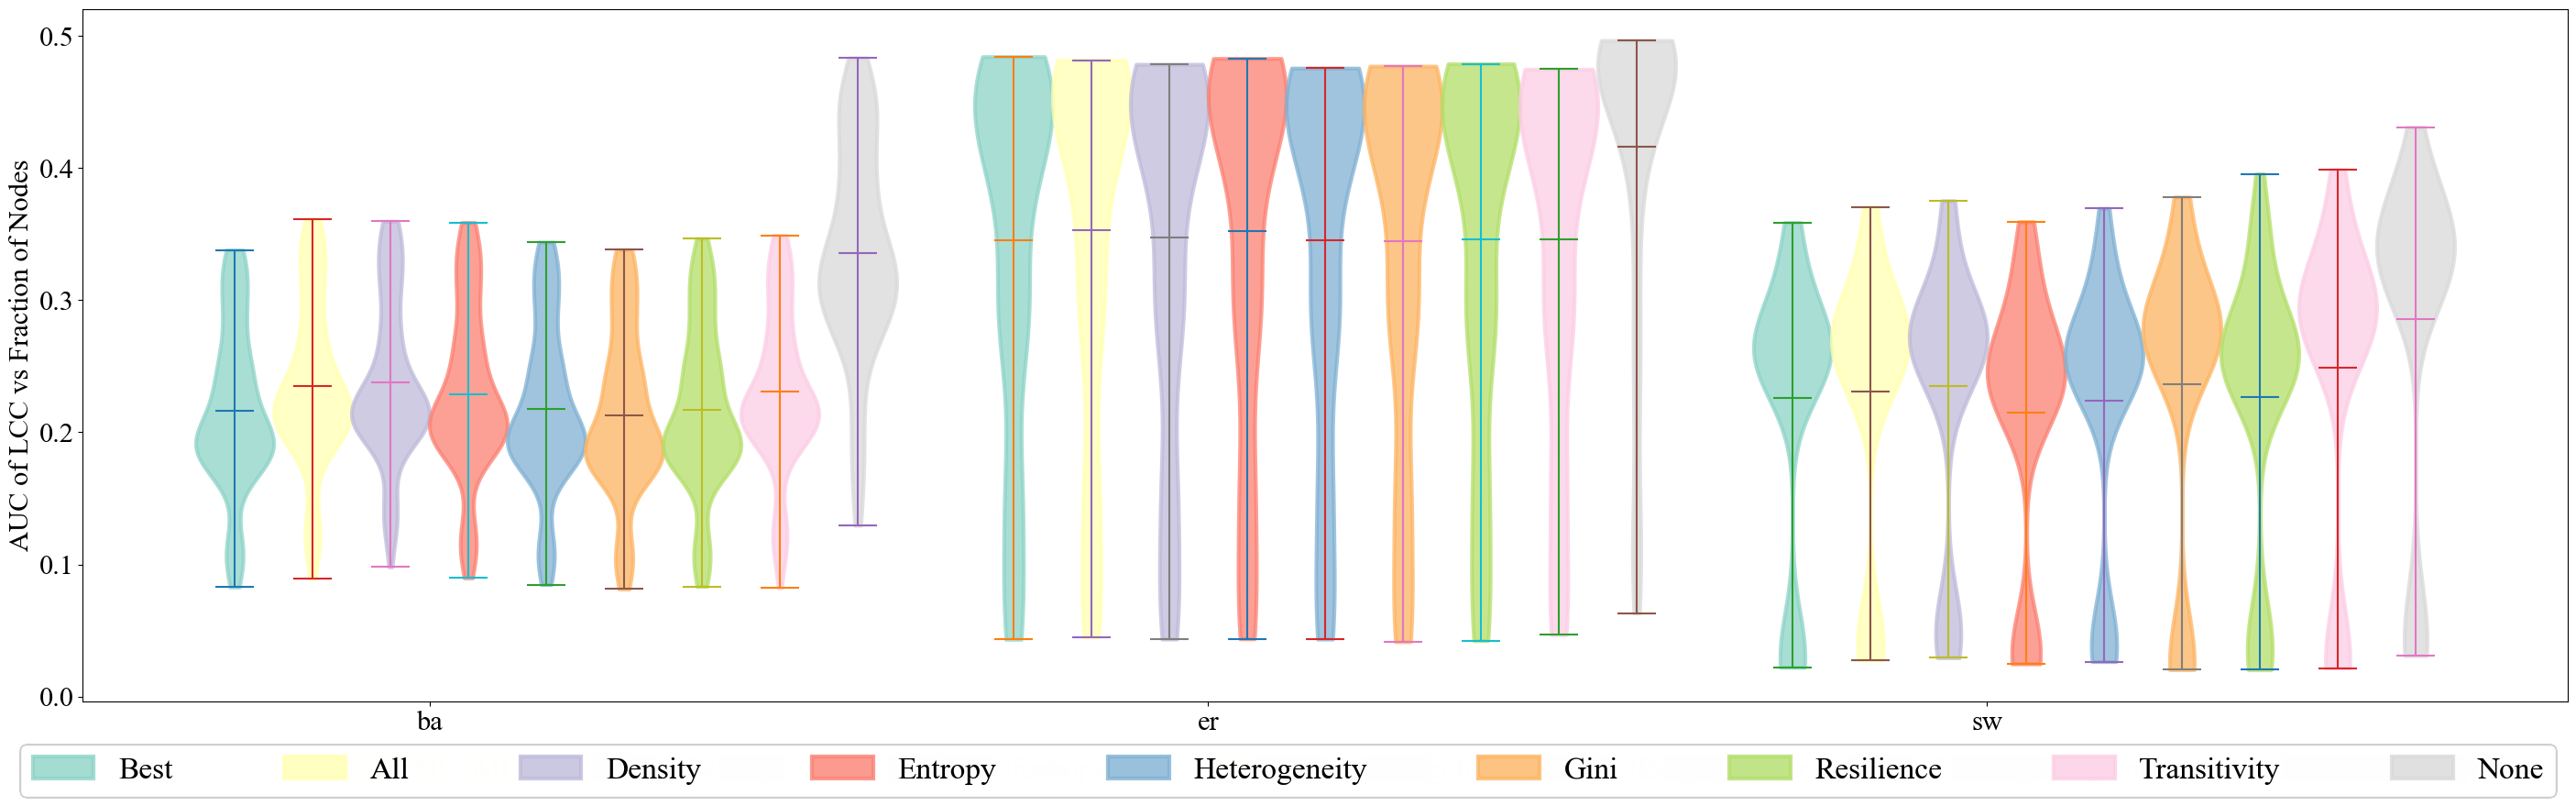

In [124]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['Best','All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#8dd3c7', '#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['ba','All_ba', 'Density_ba', 'Entropy_ba', 'Heterogeneity_ba','Gini_ba','Resilience_ba', 'Transitivity_ba', 'None_ba']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(28, 8), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
font = {'weight' : 'normal',
    'size'   : 22}
matplotlib.rc('font', **font)
n_models = len(labeling)
shift = 1 / (n_models + 1)
handles = []

for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                    data = {"ba": [], 
                        "er":[], 
                        "sw":[]}
                    for pos,evalType in enumerate(['Degree','Homogeneity']):
                        result = SAVE[model][method]
                        data["ba"] =  data["ba"]+  result[evalType]["barabasi"][measure] 
                        data["er"] = data["er"]+  result[evalType]["erdos"][measure] 
                        data["sw"] = data["sw"]+  result[evalType]["small-world"][measure] 
                    for position,key in enumerate(data):
                        '''bp = ax.boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=1.5,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                        if position == 0:
                            handles.append(bp["boxes"][0])'''
                        bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                        for pc in bp["bodies"]:
                            pc.set_facecolor(color[color_code])
                            pc.set_edgecolor(color[color_code])
                            pc.set_linewidth(3)
                            pc.set_alpha(0.75)
                        if position == 0:
                            handles.append(bp["bodies"][0])
                    ax.set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax.set_xticks(np.arange(0, len(data))*20)
                    ax.set_xticklabels(data.keys())
            '''else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2'''
            fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
            #fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
#fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (BA)")
get_data_global_feature(result, model_name,graphType="barabasi" ,savepath="./Figure/BoxPlots/BA")
#plt.savefig("./Figure/BoxPlots/Single_BA_GlobalFeature.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

## Mix Model

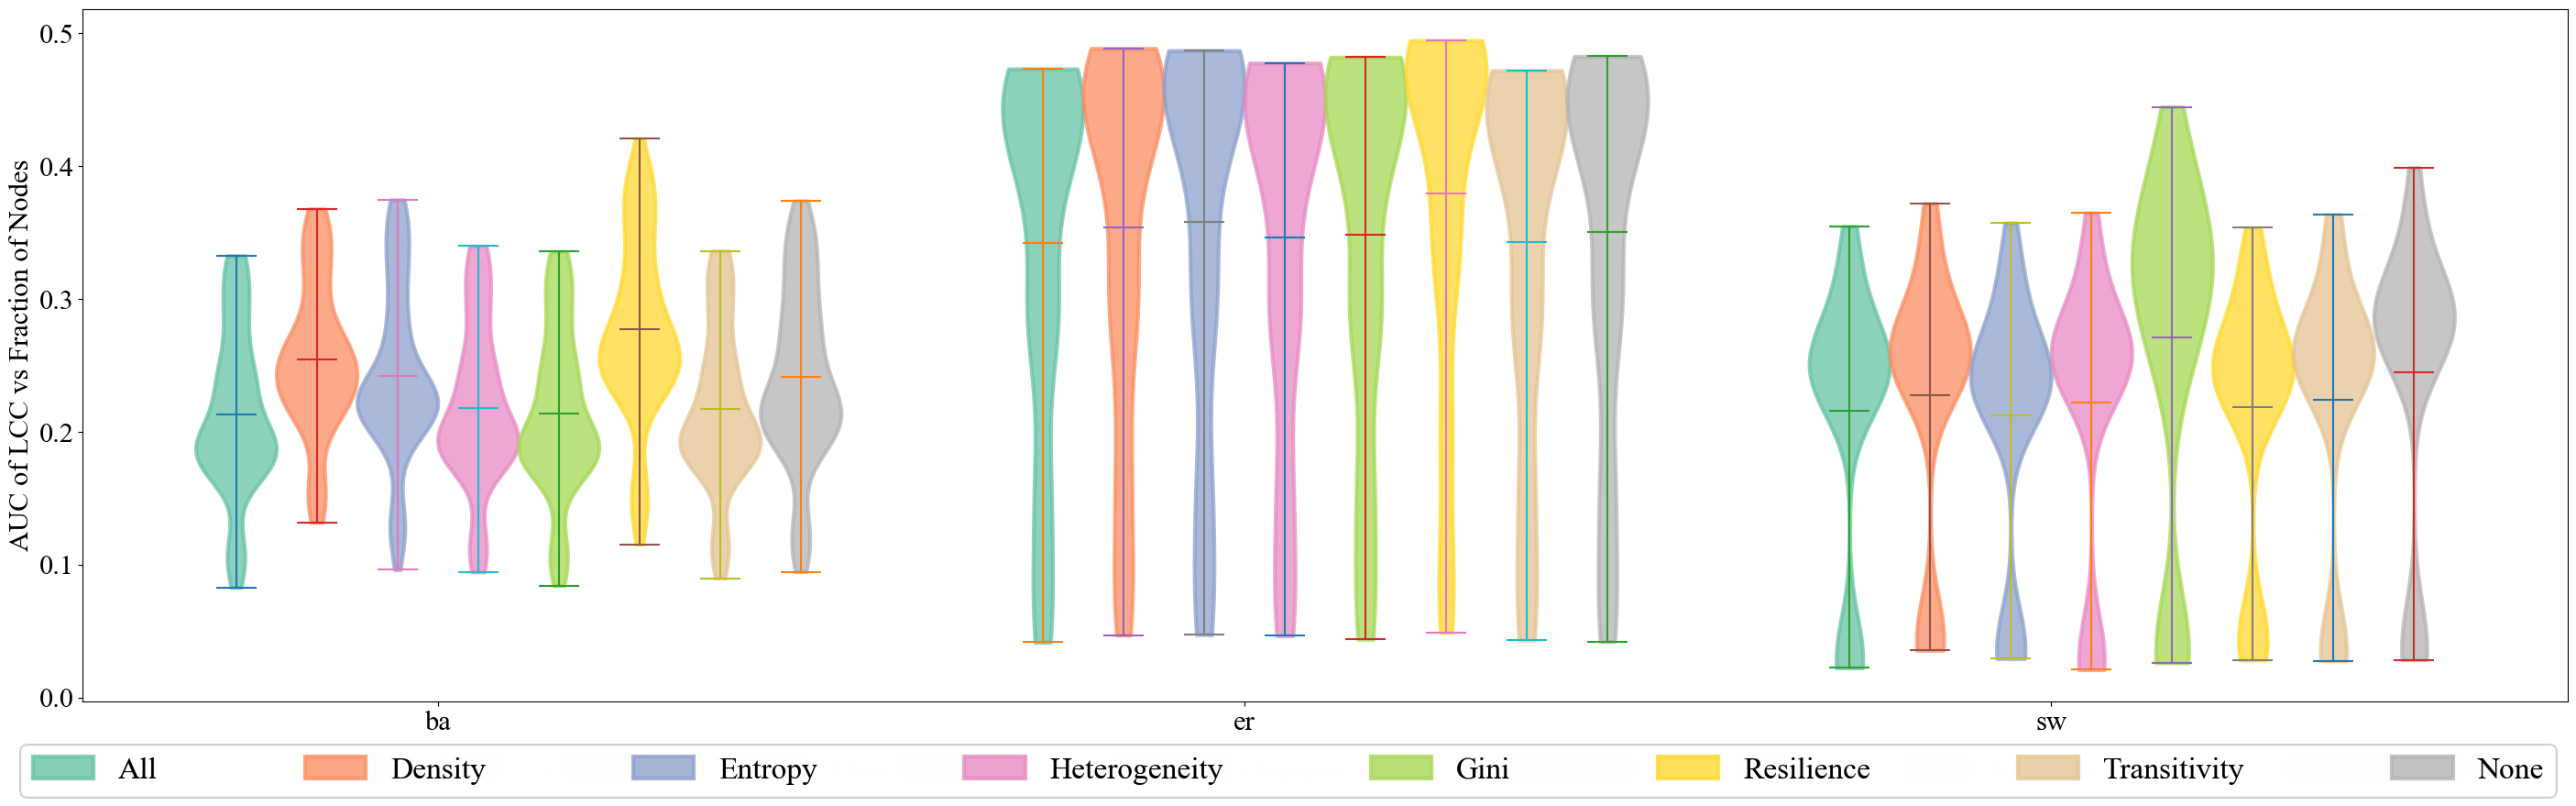

In [125]:
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini' ,'Resilience','Transitivity', 'None']
model_name = ['mix', 'Density_mix', 'Entropy_mix', 'Heterogeneity_mix','Gini_mix','Resilience_mix', 'Transitivity_mix', 'None_mix']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(28, 8), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
font = {'weight' : 'normal',
    'size'   : 22}
matplotlib.rc('font', **font)
n_models = len(labeling)
shift = 1 / (n_models + 1)
handles = []

for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                    data = {"ba": [], 
                        "er":[], 
                        "sw":[]}
                    for pos,evalType in enumerate(['Degree','Homogeneity']):
                        result = SAVE[model][method]
                        data["ba"] =  data["ba"]+  result[evalType]["barabasi"][measure] 
                        data["er"] = data["er"]+  result[evalType]["erdos"][measure] 
                        data["sw"] = data["sw"]+  result[evalType]["small-world"][measure] 
                    for position,key in enumerate(data):
                        '''bp = ax.boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=1.5,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                        if position == 0:
                            handles.append(bp["boxes"][0])'''
                        bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                        for pc in bp["bodies"]:
                            pc.set_facecolor(color[color_code])
                            pc.set_edgecolor(color[color_code])
                            pc.set_linewidth(3)
                            pc.set_alpha(0.75)
                        if position == 0:
                            handles.append(bp["bodies"][0])
                    ax.set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax.set_xticks(np.arange(0, len(data))*20)
                    ax.set_xticklabels(data.keys())
            '''else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())'''
            x = (color_code + 1) * shift - shift / 2
            fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
            #fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
#fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (Mix)")
get_data_global_feature(result, model_name,graphType="all" , savepath="./Figure/BoxPlots/Mix")
#plt.savefig("./Figure/BoxPlots/Single_Mix_GlobalFeature.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

## Small World Model

In [ ]:
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini' ,'Resilience','Transitivity', 'None']
model_name = ['sw', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_sw']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(28, 8), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
font = {'weight' : 'normal',
    'size'   : 22}
matplotlib.rc('font', **font)
n_models = len(labeling)
shift = 1 / (n_models + 1)
handles = []

for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                        if (pos == 0) and (position == 0):
                                handles.append(bp["boxes"][0])
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            '''else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())'''
            x = (color_code + 1) * shift - shift / 2
            fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
            #fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
#fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (Mix)")
plt.savefig("./Figure/BoxPlots/Single_SW_GlobalFeature.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

# Compare State of the Art

In [7]:
import matplotlib
from math import pi 
import copy
def boxplot_appeal(bp):
    for flier in bp['fliers']:    # outliers
        flier.set_markersize(4)
        flier.set_marker('o')
    for box in bp['boxes']:     # box bodys
        '''box.set_facecolor('green')
        box.set_edgecolor('black')'''
        box.set_linewidth(1)
    for whisker in bp['whiskers']:   # whisker line
        whisker.set_linewidth(2)
    for cap in bp['caps']:     # cap line
        cap.set_color('red')
        cap.set_linewidth(4)
    for median in bp['medians']:   # median line
        median.set_linewidth(3)
def plot_boxplot_single(SAVE,model_name,method, labeling,color,obj,measure='auc'):
    font = {'family':"Times New Roman",
            'weight' : 'normal',
        'size'   : 24}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots(figsize=(20, 10), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    n_models = len(labeling)
    shift = 1 / (n_models + 1)
    handles = []
    csv_data = []
    for color_code, model in enumerate(model_name):
        if method == "result_Syn":
            result = SAVE[model][method]
            data = {"ba":[], 
                "er":[], 
                "sw":[],
                "regular":[],
                "sbm":[]}
            #for pos,evalType in enumerate(['Degree','Homogeneity']):
            for pos,evalType in enumerate(['synthetic']):
                #for pos,evalType in enumerate(['Degree']):
                data['ba'] = data['ba'] + result[evalType]["barabasi"][measure]
                data['er'] = data['er'] + result[evalType]["erdos"][measure]
                data['sw'] =  data['sw'] + result[evalType]["small-world"][measure]
                data['regular'] =  data['regular'] + result[evalType]["regular"][measure]
                data['sbm'] =  data['sbm'] + result[evalType]["sbm"][measure]
            for position,key in enumerate(data):
                #bp = ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                for pc in bp["bodies"]:
                    pc.set_facecolor(color[color_code])
                    pc.set_edgecolor(color[color_code])
                    pc.set_linewidth(1.5)
                    pc.set_alpha(0.5)
                '''boxplot_appeal(bp)'''
                if position == 0:
                    #handles.append(bp["boxes"][0])
                    handles.append(bp["bodies"][0])
            if measure == 'auc':
                ax.set_ylabel(r'AUC of ($\sigma_{%s}$ vs Nodes Removed)'%objectiveFunction, fontsize=24)
            else:
                ax.set_ylabel('Fraction of Nodes Removed',fontsize=32)
            ax.set_xticks(np.arange(0, len(data))*20,fontsize=32)
            ax.set_xticklabels(data.keys(),fontsize=32)
        else:
            result = SAVE[model][method]
            data = {"cycle":[], 
                    "clique":[],
                    "house":[], 
                    "grid":[],
                    "fan":[],
                    "star":[],
                    "diamond":[]}
            for pos,evalType in enumerate(['BA','Tree']):
                data["cycle"] = data["cycle"] + result[evalType]["cycle"][measure]
                data["clique"] = data["clique"] + result[evalType]["clique"][measure]
                data["house"] = data["house"] + result[evalType]["house"][measure]
                data["grid"] = data["grid"] + result[evalType]["grid"][measure]
                data["fan"] = data["fan"] + result[evalType]["fan"][measure]
                data["star"] = data["star"] + result[evalType]["star"][measure]
                data["diamond"] = data["diamond"] + result[evalType]["diamond"][measure]

            for position,key in enumerate(data):
                bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                for pc in bp["bodies"]:
                    pc.set_facecolor(color[color_code])
                    pc.set_edgecolor(color[color_code])
                    pc.set_linewidth(1.5)
                    pc.set_alpha(0.5)
                if pos == 0 and position == 0:
                    handles.append(bp["bodies"][0])
                    #handles.append(bp["boxes"][0])
                if measure == 'auc':
                    ax.set_ylabel(r'AUC of ($\sigma_{%s}$ vs Nodes Removed)'%obj, fontsize=24)
                else:
                    ax.set_ylabel('Fraction of Nodes Removed', fontsize=24)
                ax.set_xticks(np.arange(0, len(data))*20, fontsize=24)
                ax.set_xticklabels(data.keys(), fontsize=24)
        x = (color_code + 1) * shift - shift / 2
        data = list_to_csv(data,labeling[color_code])
        csv_data += data
    convert_box_csv(csv_data,obj,"./Figure/BoxPlots/Box_"+obj)
    #create_csv(data, model_name,"./Figure/BoxPlots/Combine:"+obj+"_"+method+"_"+measure.upper())
    #fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=32, mode = "expand", ncol = len(labeling))
    #plt.savefig("./Figure/BoxPlots/Combine:"+obj+"_"+method+"_"+measure.upper()+".png", bbox_inches='tight', pad_inches=0.1)
    #plt.show()
    return csv_data
def plot_boxplot(SAVE,model_name,method, labeling,color,obj,measure='auc'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    n_models = len(labeling)
    shift = 1 / (n_models + 1)
    handles = []
    for color_code, model in enumerate(model_name):
        if method == "result_Syn":
            #for pos,evalType in enumerate(['Degree','Homogeneity']):
            for pos,evalType in enumerate(['synthetic']):
                #for pos,evalType in enumerate(['Degree']):
                result = SAVE[model][method]
                
                data = {"ba":result[evalType]["barabasi"][measure], 
                "er":result[evalType]["erdos"][measure], 
                "sw":result[evalType]["small-world"][measure],
                "regular":result[evalType]["regular"][measure],
                "sbm":result[evalType]["sbm"][measure]}
                for position,key in enumerate(data):
                    #bp = ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                    bp = ax[pos].violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                    for pc in bp["bodies"]:
                        pc.set_facecolor(color[color_code])
                        pc.set_edgecolor(color[color_code])
                        pc.set_linewidth(1.5)
                        pc.set_alpha(0.5)
                    '''boxplot_appeal(bp)'''
                    if pos == 0 and position == 0:
                        #handles.append(bp["boxes"][0])
                        handles.append(bp["bodies"][0])
                if measure == 'auc':
                    ax.set_ylabel(r'AUC of ($\sigma_{%s}$ vs Nodes Removed)'%objectiveFunction, fontsize=24)
                else:
                    ax[pos].set_ylabel('Fraction of Nodes Removed')
                ax[pos].set_xticks(np.arange(0, len(data))*20)
                ax[pos].set_xticklabels(data.keys())
        else:
            for pos,evalType in enumerate(['BA','Tree']):
                #for pos,evalType in enumerate(['BA']):
                #pos +=1
                #pos +=2
                result = SAVE[model][method]
                data = {"cycle":result[evalType]["cycle"][measure], 
                            "clique":result[evalType]["clique"][measure],
                            "house":result[evalType]["house"][measure], 
                            "grid":result[evalType]["grid"][measure],
                            "fan":result[evalType]["fan"][measure],
                            "star":result[evalType]["star"][measure],
                            "diamond":result[evalType]["diamond"][measure]}
                for position,key in enumerate(data):
                    bp = ax[pos].violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                    for pc in bp["bodies"]:
                        pc.set_facecolor(color[color_code])
                        pc.set_edgecolor(color[color_code])
                        pc.set_linewidth(1.5)
                        pc.set_alpha(0.5)
                    if pos == 0 and position == 0:
                        handles.append(bp["bodies"][0])
                        #handles.append(bp["boxes"][0])
                    if measure == 'auc':
                        ax.set_ylabel('AUC of' +'r($\sigma_{%s}$)'%objectiveFunction+' vs Nodes Removed', fontsize=32)
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                    ax[pos].set_xticks(np.arange(0, len(data))*20, fontsize=24)
                    ax[pos].set_xticklabels(data.keys(), fontsize=24)
        x = (color_code + 1) * shift - shift / 2
        #fig.text(x+0.075, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
    #ax[-1].legend(handles,labeling,loc="upper left", fontsize=24, bbox_to_anchor=(1,1))
    #ax[0].legend(handles,labeling,loc="lower left", fontsize=24, mode = "expand", ncol = len(labeling))
    fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
    #plt.savefig("./Figure/BoxPlots/"+obj+"_"+method+"_"+measure.upper()+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    return data
    

#plot_barplot(SAVE,model_name, labeling,color,measure='auc')
def plot_bargraph(SAVE,model_name, method, labeling,color, objectiveFunction,measure='auc'):
    if method == "result_Syn":
        #data = {"Degree": {"ba":[], "er":[],"sw":[]},"Homogeneity": {"ba":[], "er":[],"sw":[]}}   
        data = {"synthetic": {"ba":[], "er":[],"sw":[]},"Homogeneity": {"ba":[], "er":[],"sw":[]}}   
        data = {"synthetic": {"ba":[], "er":[],"sw":[],"regular":[],"sbm":[]}}   
        cond = True
        title = "Synthetic Graph"
        save = "syn"
    elif method == "result_SynMotif":
        data = {"BA": {"cycle":[],"clique":[],"house":[],"grid":[],"fan":[],"star":[],"diamond":[]},
                "Tree": {"cycle":[],"clique":[],"house":[],"grid":[],"fan":[],"star":[],"diamond":[]}}
        cond = False
        title = "Synthetic Graph with Motifs Attached"
        save = "synMotif"
    for color_code, model in enumerate(model_name):
        if cond:
            #evalType =(['Degree','Homogeneity']):
            for evalType in data:
                result = SAVE[model][method]
                # ER limited to only 88 since finder only had data for 88 graph
                data[evalType]["ba"].append(sum(result[evalType]["barabasi"][measure]))
                data[evalType]["er"].append(sum(result[evalType]["erdos"][measure]))
                data[evalType]["sw"].append(sum(result[evalType]["small-world"][measure]))
                data[evalType]["regular"].append(sum(result[evalType]["regular"][measure]))
                data[evalType]["sbm"].append(sum(result[evalType]["sbm"][measure]))
        else:
            #for evalType =(['BA','Tree']):
            for evalType in data:
                result = SAVE[model][method]
                # cycle motifs limited to only 36 since finder only had data for 36 graph
                data[evalType]["cycle"].append(sum(result[evalType]["cycle"][measure]))
                data[evalType]["clique"].append(sum(result[evalType]["clique"][measure]))
                data[evalType]["house"].append(sum(result[evalType]["house"][measure]))
                data[evalType]["grid"].append(sum(result[evalType]["grid"][measure]))
                data[evalType]["fan"].append(sum(result[evalType]["fan"][measure]))
                data[evalType]["star"].append(sum(result[evalType]["star"][measure]))
                data[evalType]["diamond"].append(sum(result[evalType]["diamond"][measure]))
    # these are models => BA, MIX, CI, FINDER
    model = tuple(model_name)
    width = 0.25
    fig, ax = plt.subplots(figsize=(18, 12), dpi=100, constrained_layout=True,gridspec_kw={'wspace':0.1,'hspace':0.1})
    x = np.arange(len(model)) 
    multiplier = 0
    bar_label = list(data.keys())*len(model)
    def autolabel(rects, title, cond):
        for rect in rects:
            h = rect.get_height()
            if cond:
                ax.text(rect.get_x()+rect.get_width()/2., 5, title,
                    ha='center', va='bottom',rotation="vertical",fontweight="heavy",fontsize="large")
            else:
                ax.text(rect.get_x()+rect.get_width()/2., rect.get_y()+h+3.5, title,
                    ha='center', va='bottom',weight="heavy")
    for i, (attribute, measurement) in enumerate(data.items()): 
        #bar_label = [attribute]*len(model)
        bottom = np.zeros(len(model))
        offset = 0# width * multiplier
        for j, (boolean, dataType) in enumerate(measurement.items()):
            if i == 0:
                p = ax.bar(x+offset, dataType, width,color = color[j], label=boolean, edgecolor = "black", bottom=bottom,linewidth=2)
            else:
                p = ax.bar(x+offset, dataType, width, color= color[j], edgecolor = "black", bottom=bottom,linewidth=2)
            bottom += dataType
        autolabel(p,attribute,True)
        multiplier += 1
        ax.bar_label(p, padding=3, fontsize=22, fontweight="heavy",fmt="%3.2f")
        #ax.bar_label(p,labels=bar_label, padding=3, fontsize=12)
    labeling= [l.upper() for l in labeling]
    #ax.set_xticks(x + width/2, labeling)
    ax.set_xticks(x, labeling)
    ax.set_title(objectiveFunction+ ": Evalution of models on "+ title, fontsize=32)
    ax.legend(loc="upper left", fontsize=24, bbox_to_anchor=(1,1))
    plt.ylabel("AUC of (Objective function vs Nodes Removed) plot", fontsize=26)
    plt.savefig("./Figure/BarGraph/"+objectiveFunction+"_"+save+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    return data
    
#plot_barplot(SAVE,model_name, labeling,color,measure='auc')
def plot_radarchart(SAVE,model_name, method, labeling,color, objectiveFunction,measure='auc'):
    font = {'family':"Times New Roman",
            'weight' : 'normal',
        'size'   : 24}
    matplotlib.rc('font', **font)
    if method == "result_Syn":
        data = {"ba":[], "er":[],"sw":[],"regular":[],"sbm":[]}
        label = {"ba":[], "er":[],"sw":[],"regular":[],"sbm":[]}
        csv_data = {"ba":[], "er":[],"sw":[],"regular":[],"sbm":[]}
        cond = True
        title = "Synthetic Graph"
        save = "syn"
    sumLabel = {l: 0 for l in labeling}
    for color_code, model in enumerate(model_name):
        if cond:
            #evalType =(['Degree','Homogeneity']):
            for evalType in SAVE[model][method]:
                result = SAVE[model][method]
                # ER limited to only 88 since finder only had data for 88 graph
                data["ba"].append(sum(result[evalType]["barabasi"][measure]))
                data["er"].append(sum(result[evalType]["erdos"][measure]))
                data["sw"].append(sum(result[evalType]["small-world"][measure]))
                data["regular"].append(sum(result[evalType]["regular"][measure]))
                data["sbm"].append(sum(result[evalType]["sbm"][measure]))
            sumLabel[labeling[color_code]] = data["ba"][-1] + data["er"][-1] + data["sw"][-1] + data["regular"][-1] + data["sbm"][-1]
    for value in data:
        res = np.array(data[value])
        csv_data[value] = data[value]
        res = (sum(res) - res)#/sum(res) #(sum(res) - res)/sum(res)
        label[value] = [r if r == max(res) or r == min(res) else 0 for r in res]
        data[value] = [(val - np.min(res)) / (np.max(res) - np.min(res))  * 0.8 + 0.2 for val in res]
    model = tuple(model_name)
    fig = plt.figure(figsize=(10, 10), dpi=100, constrained_layout=True)

    # ------- PART 1: Create background

    # Number of variables
    categories = list(data.keys())
    N = len(categories)
    

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialize the spider plot
    ax = plt.subplot(111, polar=True)

    '''# If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)'''


    # Draw ylabels for both datasets
    #ax.set_rlabel_position(0)
    plt.yticks(np.arange(0.0,1.1,0.1),label=[], color="grey", size=0)
    plt.ylim(0, 1.15)

    # ------- PART 2: Add plots
    # Plot each individual group as a separate line
    dic = {}
    for i, group in enumerate(model_name):
        values = [data[cat][i] for cat in categories]
        labels = [label[cat][i] for cat in categories]
        values += values[:1]
        labels += labels[:1]
        #ax.plot(angles, values, linewidth=1,color=color[i], linestyle='solid', label=labeling[i])
        ax.plot(angles, values, linewidth=1,color=color[i], linestyle='solid', label=labeling[i]+": "+r"$" +f"{sumLabel[labeling[i]]:.2f}" + "$")
        ax.fill(angles, values, color=color[i],alpha=0.1)
        # Add labels to each point
        for j, (angle, label_data) in enumerate(zip(angles[0:N], labels[0:N])):
            dic[group] = [angle, values[j], label_data] 
            if label_data != 0:
            #if not (int(values[j]*10) in [int(s*10) for s in values if s != values[j]]) :
                #if (categories[j] == 'ba') and (values[j] != 1.0 and values[j] != 0.2 ):
                #    continue
                ax.text(angle, values[j], f"{label_data:.2f}", ha='center', va='center', fontsize=14, fontweight="bold")
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], [ c.upper() for c in categories], zorder= 10, fontsize = 18, fontweight="bold")
    # Add legend
    # obtain the handles and labels from the figure
    handles, labels = ax.get_legend_handles_labels()
    # copy the handles
    handles = [copy.copy(ha) for ha in handles ]
    # set the linewidths to the copies
    [ha.set_linewidth(3) for ha in handles ]
    # put the copies into the legend
    leg = plt.legend(handles=handles, labels=labels)
    plt.legend(handles,labels,loc='upper right', bbox_to_anchor=(1.6, 1),markerscale=4, fontsize=24)
    convert_radar_csv(objectiveFunction,data, model_name,savepath="./Figure/BarGraph/RADAR_"+objectiveFunction)
    # Add a title
    #create_csv(data, model_name, "./Figure/BarGraph/RADAR_"+objectiveFunction+"_"+save)
    # Show the chart
    #plt.savefig("./Figure/BarGraph/RADAR_"+objectiveFunction+"_"+save+".png", bbox_inches='tight', pad_inches=0.1)
    #plt.show()
    return data


# Largest Connected Components

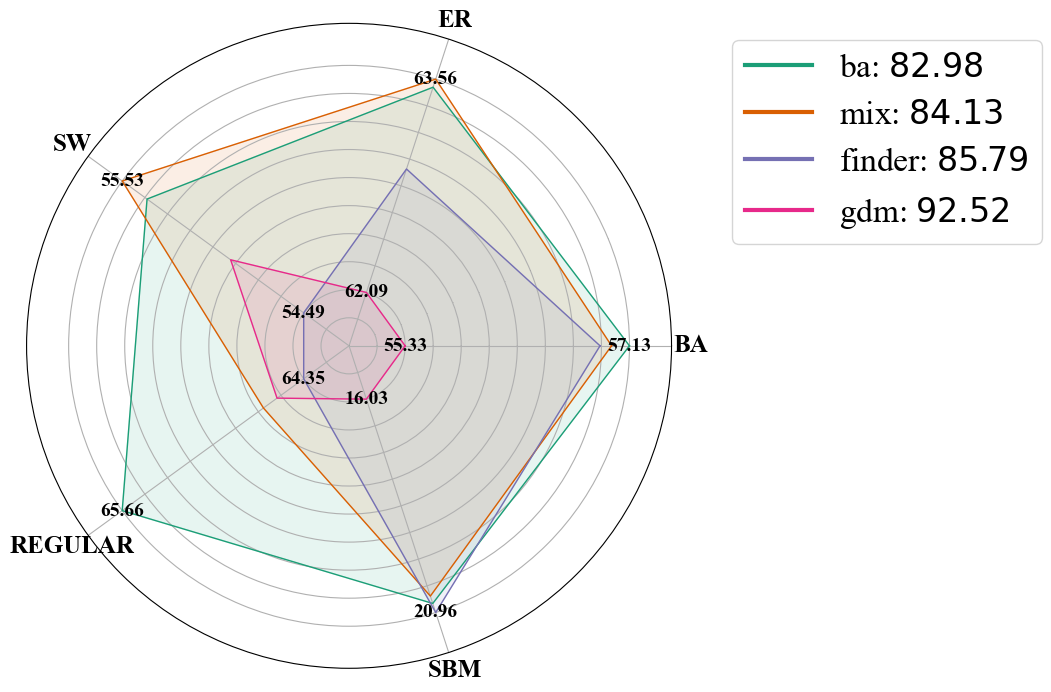

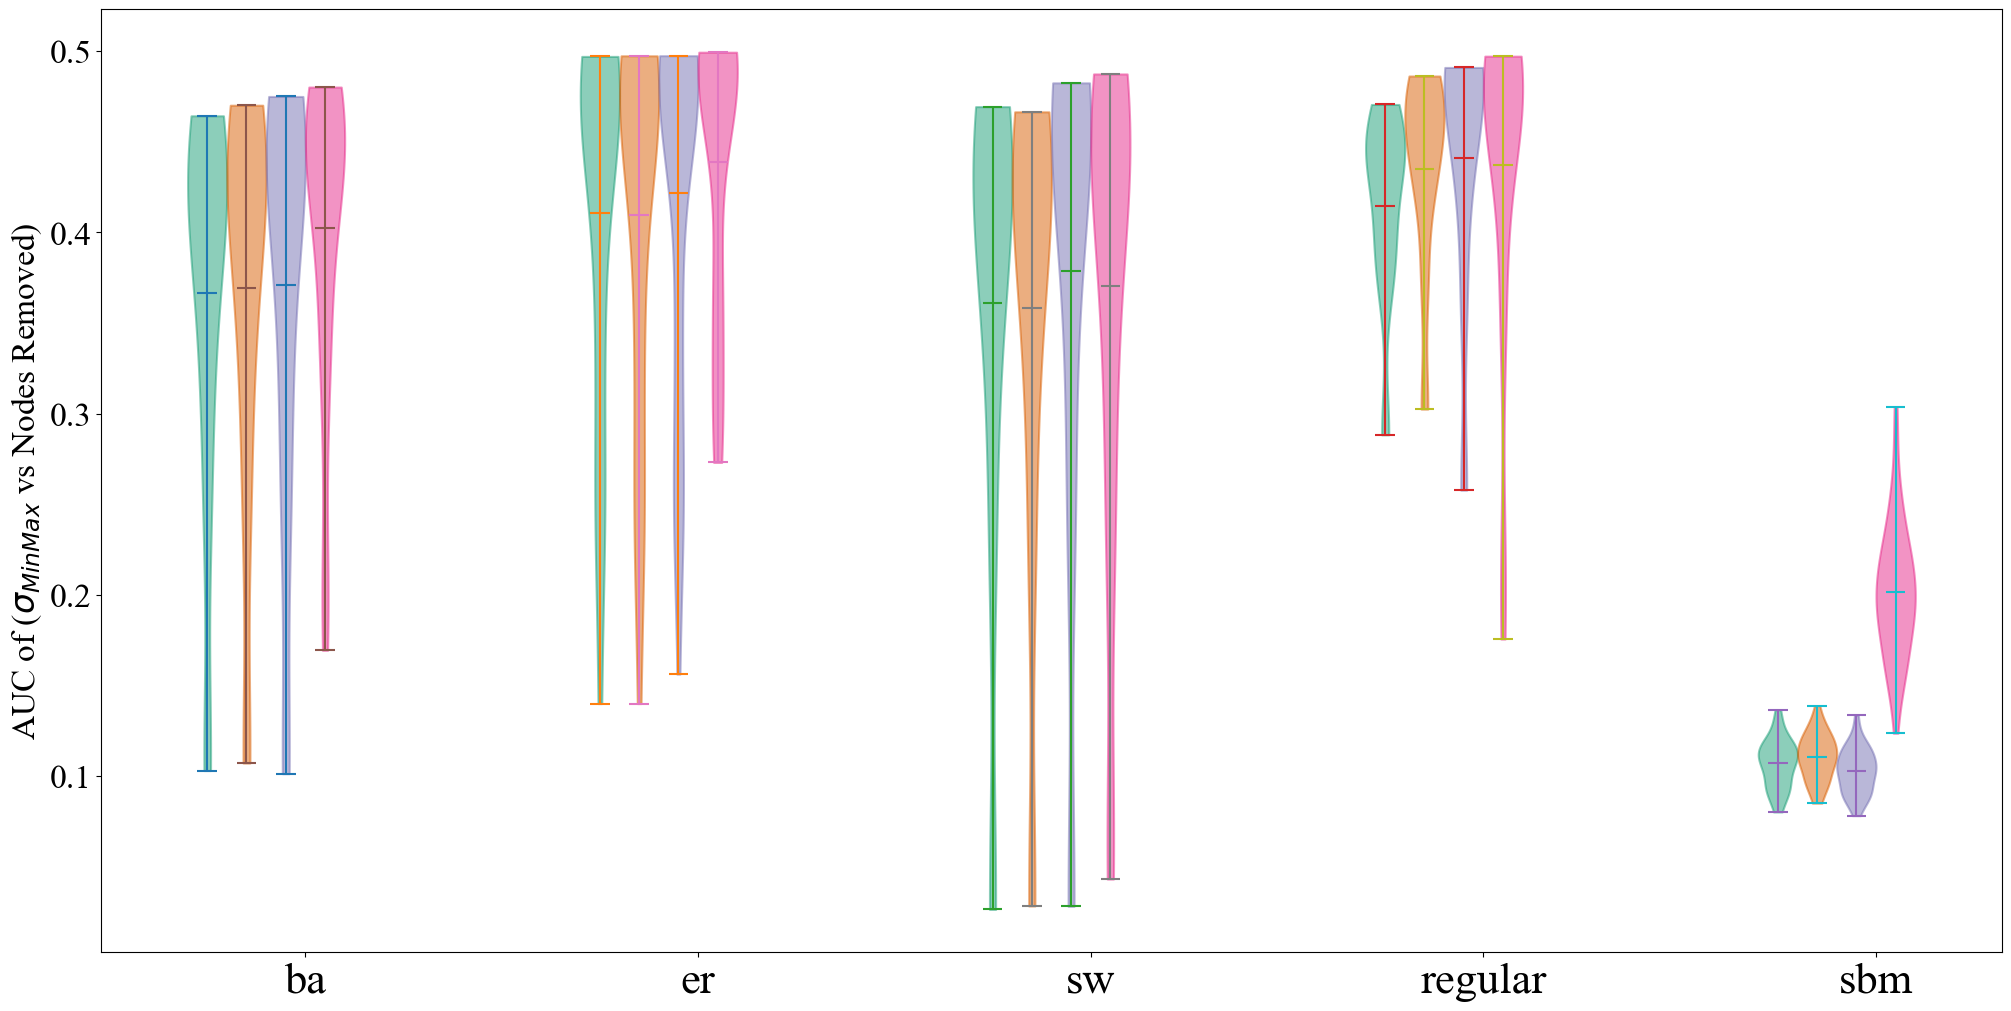

In [13]:
color_1 =  ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
labeling = ['ba', 'mix', 'finder', 'gdm','ci','corehd']
#labeling = ['ba_last','ba_inf','ba_food','ba', 'mix_clast','mix_inf','mix_food','mix']
measure = 'auc'
#measure = 'fraction'
#model_name = ['ba', 'mix', 'finder','gdm','ci','corehd']  
#model_name = ['ba', 'mix', 'finder','gdm','ci','corehd_new']  
model_name = ['ba', 'mix', 'finder','gdm']  
model_name = ['ba','mix','finder','gdm','ci','corehd_new']  
model_name = ['ba','mix','finder','gdm']  
#model_name = ['ba_last','ba_inf','ba_food','ba', 'mix_last','mix_inf','mix_food','mix']
#model_name = ['ba_food','mix_food','finder','gdm','ci','corehd_new']
#model_name = ['ba_inf','ba_food','ba', 'mix_inf','mix_food','mix', 'finder', 'gdm']
#model_name = ['ba_new','mix','finder','gdm']   
objectiveFunction = 'MinMax'
#for evaluation_method in ["result_Syn", "result_SynMotif"]:
for evaluation_method in ["result_Syn"]:
    #plot_bargraph(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    plot_radarchart(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    #plot_boxplot(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    plot_boxplot_single(SAVE,model_name,evaluation_method, labeling,color_1,objectiveFunction,measure)


# Pairwise Connectivity

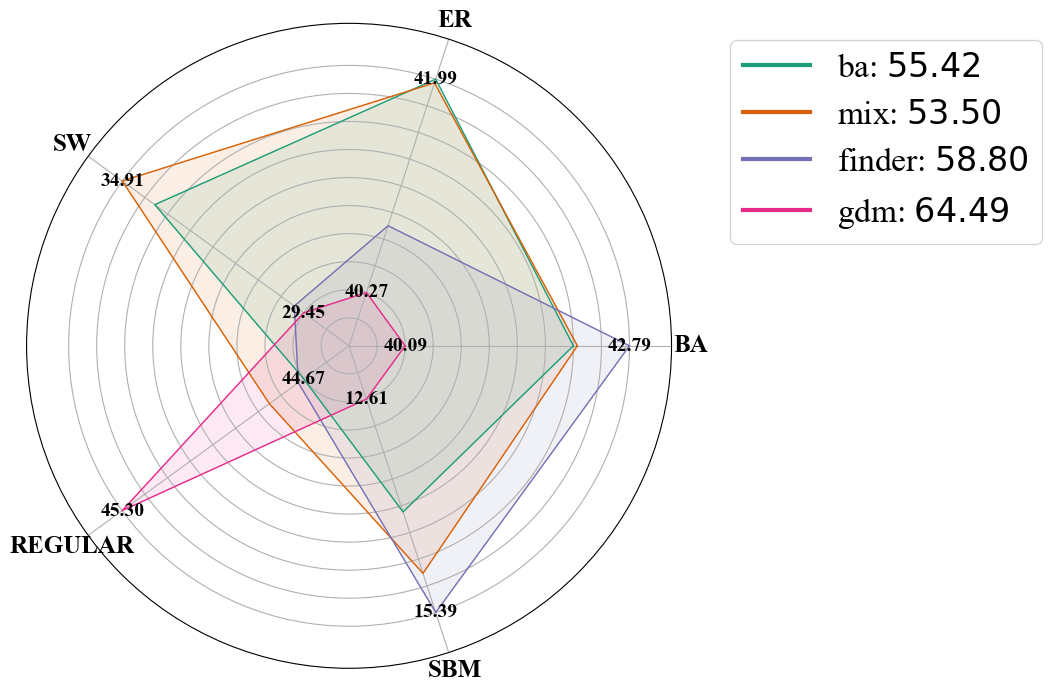

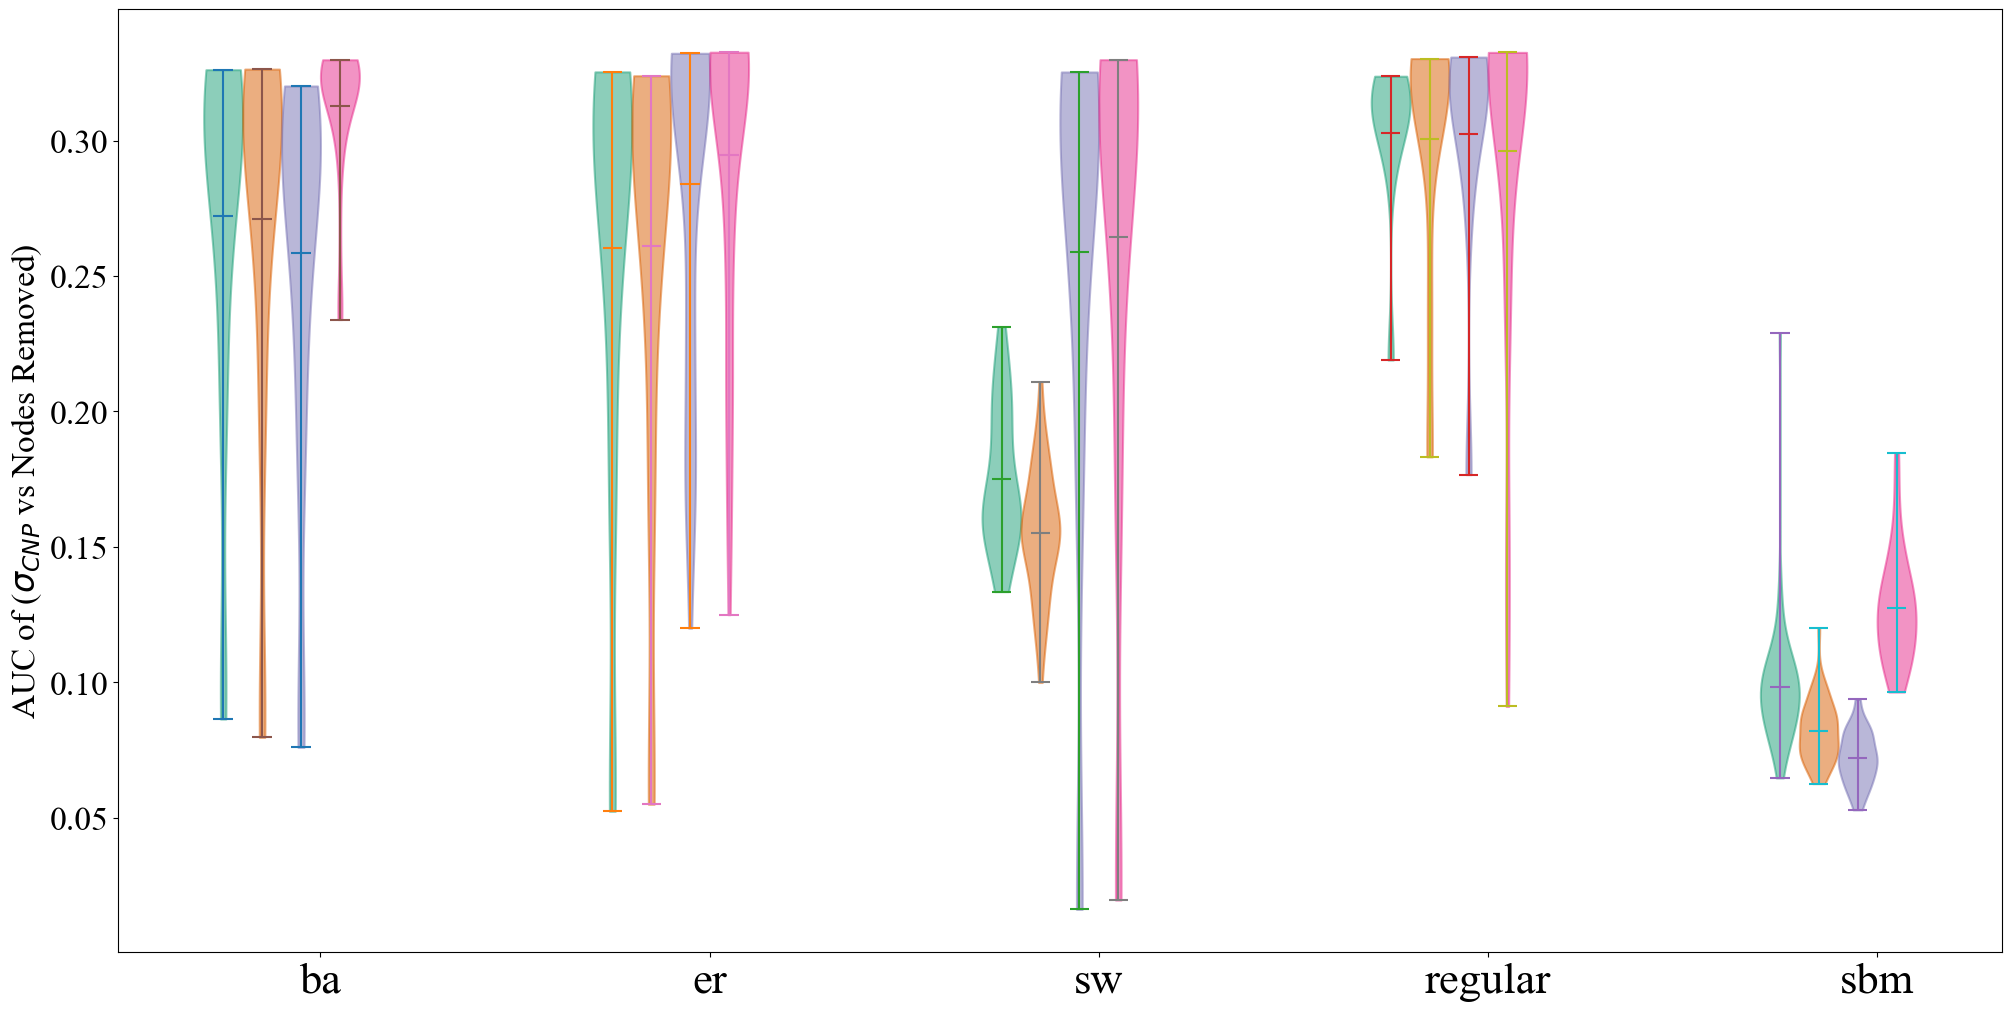

In [14]:
color_1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
color_2 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
labeling = ['ba', 'mix', 'finder','gdm', 'ci','corehd']
#labeling = ['ba-corr','ba-food','ba','mix-corr', 'mix-food','mix']

model_name = ['ba_CN', 'mix_CN', 'finder_CN', 'ci_CN','corehd_CN']
model_name = ['ba_CN_corr', 'mix_CN_corr', 'finder_CN','gdm_CN','ci_CN','corehd_new_CN']
model_name = ['ba_CN_corr', 'mix_CN_corr', 'finder_CN','gdm_CN']
#model_name = ['ba_CN_corr','ba_CN_food','ba_CN','mix_CN_corr',  'mix_CN_food','mix_CN']
#model_name = ['ba_CN_corr','mix_CN_corr', 'finder_CN','gdm_CN','ci_CN','corehd_new_CN']
measure = 'auc'
#measure = 'fraction'
objectiveFunction = 'CNP'
#for evaluation_method in ["result_Syn", "result_SynMotif"]:
for evaluation_method in ["result_Syn"]:
    #plot_bargraph(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    plot_radarchart(SAVE,model_name, evaluation_method, labeling,color_2,objectiveFunction,measure)
    #plot_boxplot(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    plot_boxplot_single(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    

# Maximum Number of Connected Components 

In [16]:
color_1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
color_2 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
labeling = ['ba', 'mix','finder', 'gdm','ci','corehd']
#labeling =  ['ba', 'mix', 'ba_MaxNum_inf', 'mix_MaxNum_inf', 'ba_MaxNum_food','mix_MaxNum_food']
model_name = ['ba_MaxNum', 'mix_MaxNum',  'ci_MaxNum','corehd_MaxNum']
model_name = ['ba_MaxNum', 'mix_MaxNum_inf','finder_MaxNum','gdm_MaxNum', 'ci_MaxNum','corehd_new_MaxNum']
model_name = ['ba_MaxNum', 'mix_MaxNum_inf','finder_MaxNum','gdm_MaxNum', 'ci_MaxNum','corehd_new_MaxNum']
measure = 'auc'
#measure = 'fraction'
objectiveFunction = 'MaxNum'
for evaluation_method in ["result_Syn"]:
    #plot_bargraph(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    plot_radarchart(SAVE,model_name, evaluation_method, labeling,color_2,objectiveFunction,measure)
    #plot_barplot(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    plot_boxplot_single(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')


KeyError: 'regular'

# Compare with Global Feature

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
def get_feature(feature_dict,evalType,featureName,fileName):
    data = []
    for f in fileName:
        data.append(feature_dict[evalType][f.split(".txt")[0]][featureName])
    return list(data)

#def plot_3d_feature(SAVE,featureList,model,method,variation,measure='auc'):
def plot_3d_feature(SAVE,featureList,model_list,method,variation,color,measure='auc'):
    getFeature = get_from_json("./Dataset/featuresNew.json")
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    for color_code, model in enumerate(model_list):
        data = {"result":[], featureList[0]:[], featureList[1]: []}
        for method in SAVE[model]:
            result = SAVE[model][method]
            for pos,evalType in enumerate(result):
                #for pos,evalType in enumerate(['Degree']):
                for variation in (result[evalType]):
                    data["result"] = data["result"] + result[evalType][variation][measure]
                    feature0 = get_feature(getFeature,featureList[0],result[evalType][variation]["graphname"])
                    data[featureList[0]] = data[featureList[0]] + feature0
                    feature1 = get_feature(getFeature,featureList[1],result[evalType][variation]["graphname"])
                    data[featureList[1]] = data[featureList[1]] + feature1
        vertices = [list(zip(data[featureList[0]],data[featureList[1]],data["result"]))]
        ax.scatter(xs = data[featureList[0]], ys = data[featureList[1]], zs = data["result"], color=color[color_code] )
        '''poly = Poly3DCollection(vertices, alpha=0.8)
        ax.add_collection3d(poly)'''
    '''xs = data[featureList[0]]
    ys = data[featureList[1]]
    zs = data["result"] 
    ax.plot_surface(xs, ys, rv.pdf(zs), cmap="plasma")'''
    ax.set_xlabel(featureList[0])
    ax.set_ylabel(featureList[1])
    ax.set_zlabel('Area Under the Curve')
    plt.show()
def plot_2d_feature(SAVE,feature,model_list,evalList,color,marker,obj,measure='auc'):
    getFeature = get_from_json("./Dataset/featuresNew.json")
    fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(28,6), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    handles = []
    for pos, variation in enumerate(evalList):
        for color_code, model in enumerate(model_list):
            data = {"result":[], feature:[]}
            for method in SAVE[model]:
                if method != "result_Syn":
                        continue
                result = SAVE[model][method]
                for evalType in result:
                    data["result"] = data["result"] + result[evalType][variation][measure]
                    feature0 = get_feature(getFeature,evalType.lower(),feature,result[evalType][variation]["graphname"])
                    data[feature] = data[feature] + feature0
            sc = ax[pos].scatter(x = data[feature], y = data["result"], color=color[color_code], marker=marker[color_code], label = model.split("_")[0])
            if pos == 0:
                    #handles.append(bp["boxes"][0])
                    handles.append(sc)
        ax[pos].set_xlabel(feature)
        ax[pos].set_ylabel("Area Under the Curve")
        ax[pos].set_title(variation)
    #plt.legend(loc="upper left", fontsize=24, bbox_to_anchor=(1,1))
    fig.legend(handles, [m.split("_")[0] for m in model_list],loc = "lower left", bbox_to_anchor=(0, -0.2,1 ,1 ),markerscale=5,  fontsize=24, mode = "expand", ncol = len(model_list))
    plt.savefig("./Figure/Feature/Performance Feature/"+obj+"_"+feature+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
                    
featureList= ["averagedegree","density","heterogeneity","diameter","assortativity","modularity","global_efficiency"]
model = "mix"
color_2 = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
#color_2 = ['#e41a1c','#ff7f00','#ffff33']
marker = ['^','^','o','o','s','s']
#marker = ['^','s','s']
model_name_cnp = [ 'ci_CN','corehd_new_CN','finder_CN','ba_CN_corr', 'mix_CN_corr']
model_name_maxnum = ['ci_MaxNum','corehd_new_MaxNum','ba_MaxNum', 'mix_MaxNum_inf' ]
model_name = ['gdm','ci','corehd_new','finder','ba', 'mix']
#evalType =  ['barabasi', 'erdos','small-world','regular','sbm']'ba_MaxNum', 'mix_MaxNum_inf'
#plot_3d_feature(SAVE,featureList,model,"result_Syn",variation, color_2)
#plot_3d_feature(SAVE,featureList,model_name,"result_Syn",variation, color_2)
'''plot_2d_feature(SAVE,featureList[0],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[1],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[2],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[3],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[4],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[5],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[6],model_name,evalType, color_2, marker,"MinMax")'''
#plot_2d_feature(SAVE,featureList[4],model_name, color_2, marker)
plot_2d_feature(SAVE,featureList[0],model_name_cnp,evalType, color_2, marker,"CNP")
plot_2d_feature(SAVE,featureList[1],model_name_cnp,evalType, color_2, marker,"CNP")
plot_2d_feature(SAVE,featureList[3],model_name_cnp,evalType, color_2, marker,"CNP")
plot_2d_feature(SAVE,featureList[4],model_name_cnp,evalType, color_2, marker,"CNP")

plot_2d_feature(SAVE,featureList[0],model_name_maxnum,evalType, color_2, marker,"MaxNum")
plot_2d_feature(SAVE,featureList[1],model_name_maxnum,evalType, color_2, marker,"MaxNum")
plot_2d_feature(SAVE,featureList[3],model_name_maxnum,evalType, color_2, marker,"MaxNum")